In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers.experimental import preprocessing

2023-09-12 13:16:22.187521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Problem 1

## Load in Data

In [13]:
hw_data = pd.read_csv('hw1data.dat', delimiter='\t', header = None)
hw_data.columns = ['x1','x2','y']
hw_data['y'] = np.where(hw_data['y'] == -1,0,1)

In [15]:
hw_data.head()

,x1,x2,y
0,0.736625,0.505442,0
1,0.710665,0.565037,0
2,0.105335,0.068896,1
3,0.958604,0.163903,1
4,0.423693,0.510519,0


In [18]:
train_data = hw_data.sample(frac=0.8, random_state=0)
test_data = hw_data.drop(train_data.index)

train_features = train_data[['x1','x2']]
train_labels = train_data['y']

test_features = test_data[['x1','x2']]
test_labels = test_data['y']

## Optimizer: SGD

The initial random weights of layers can be defined by specifying weight and bias initializers. For each of the above layers, initialize the kernel weights from a Xavier/Glorot uniform distribution and set the random seed to 99.

In [22]:
# Normalization
normalizer = preprocessing.Normalization(axis = -1)
normalizer.adapt(tf.constant(train_features))

In [85]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

def get_model_sgd(my_activation, my_momentum):
    
    temp_model = keras.Sequential([
        normalizer,
        layers.Dense(5, activation = my_activation),
        layers.Dense(1, activation = 'sigmoid')
    ])
    
    temp_model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                       optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = my_momentum),
                       metrics = ['accuracy']
                      )
    
    return temp_model

### Activation Function: ReLU

In [67]:
model1 = get_model_sgd('relu',0)
model2 = get_model_sgd('relu', 0.1)
model3 = get_model_sgd('relu',0.5)
model4 = get_model_sgd('relu',0.9)

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


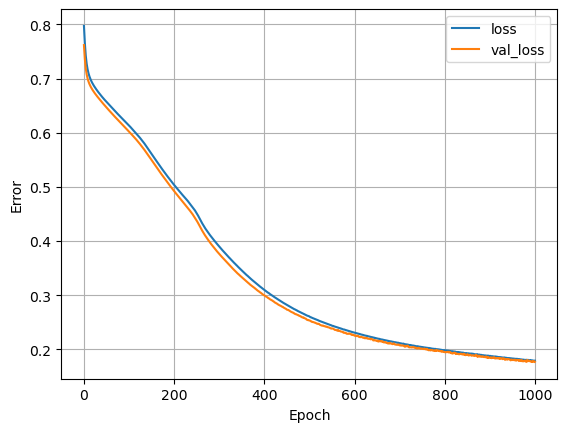

In [68]:
history1 = model1.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
plot_loss(history1)

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


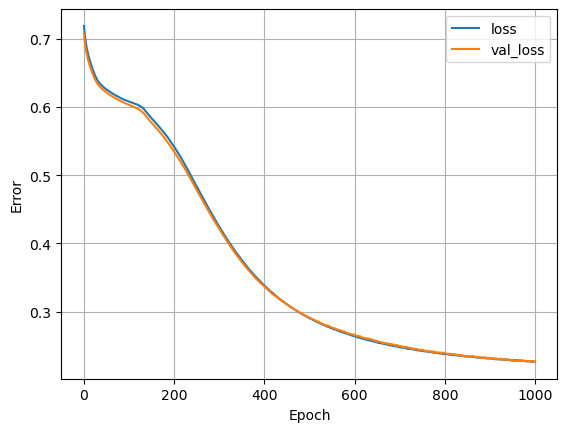

In [69]:
history2 = model2.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2)
plot_loss(history2)

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


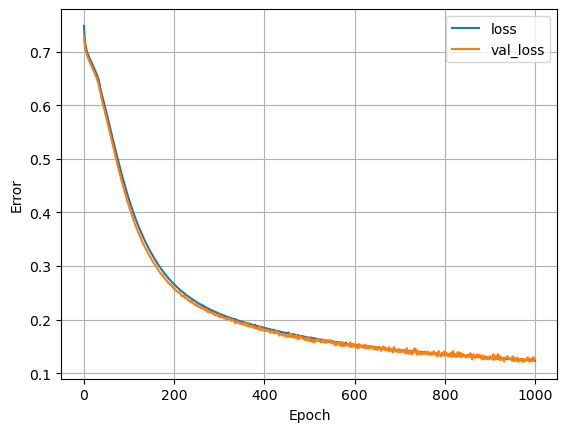

In [70]:
history3 = model3.fit(train_features, train_labels, epochs = 1000, verbose = 0, validation_split = 0.2)
plot_loss(history3)

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


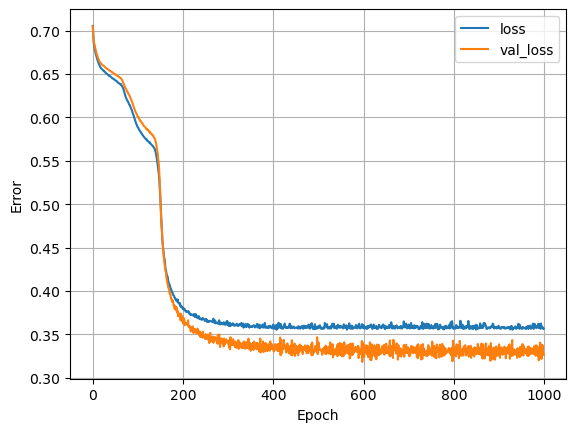

In [71]:
history4 = model4.fit(train_features, train_labels, epochs = 1000, verbose = 0, validation_split = 0.2)
plot_loss(history4)

In [73]:
model1.predict([0.2,0.8])

1/1 [==============================] - 0s 38ms/step


array([[0.7385548]], dtype=float32)

In [75]:
model2.predict([0.2,0.8])

1/1 [==============================] - 0s 59ms/step


array([[0.71786505]], dtype=float32)

In [76]:
model3.predict([0.2,0.8])

1/1 [==============================] - 0s 60ms/step


array([[0.91128147]], dtype=float32)

In [77]:
model4.predict([0.2,0.8])

1/1 [==============================] - 0s 58ms/step


array([[0.8663034]], dtype=float32)

### Activation Function: Tanh

In [78]:
model1 = get_model_sgd('tanh',0)
model2 = get_model_sgd('tanh', 0.1)
model3 = get_model_sgd('tanh',0.5)
model4 = get_model_sgd('tanh',0.9)

history1 = model1.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history2 = model2.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history3 = model3.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history4 = model4.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/pyt

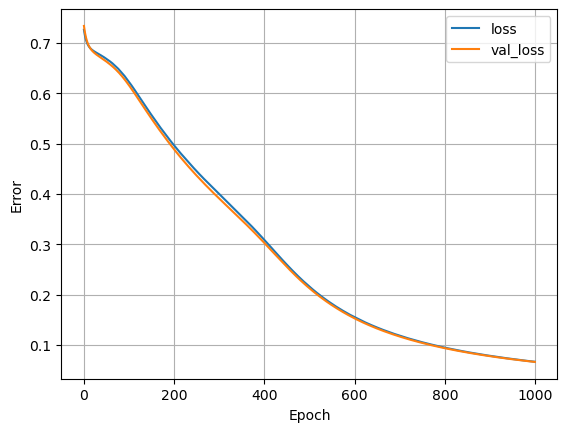

In [79]:
plot_loss(history1)

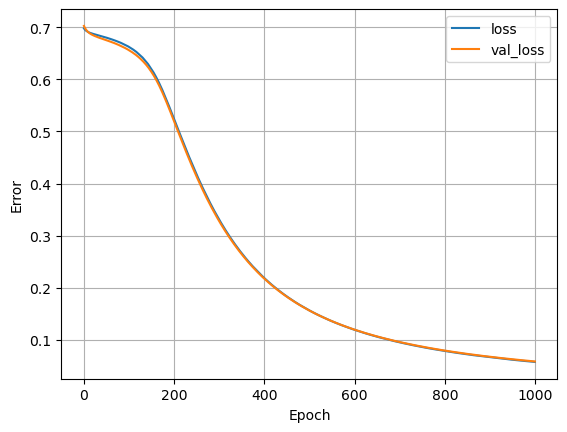

In [80]:
plot_loss(history2)

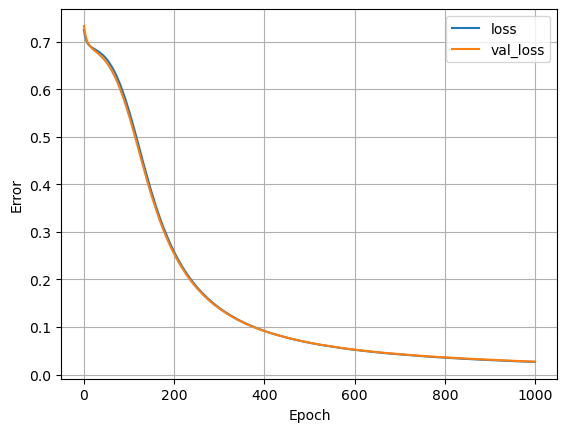

In [81]:
plot_loss(history3)

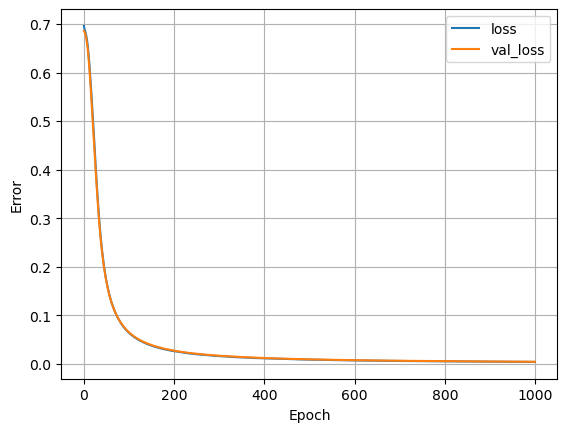

In [82]:
plot_loss(history4)

### Activation Function: Sigmoid

In [86]:
model1 = get_model_sgd('sigmoid',0)
model2 = get_model_sgd('sigmoid', 0.1)
model3 = get_model_sgd('sigmoid',0.5)
model4 = get_model_sgd('sigmoid',0.9)

history1 = model1.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history2 = model2.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history3 = model3.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history4 = model4.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/pyt

## Optimizer: RMSprope

In [163]:
def get_model_rms(my_activation, my_learning_rate):
    
    temp_model = keras.Sequential([
        normalizer,
        layers.Dense(5, activation = my_activation),
        layers.Dense(1, activation = 'sigmoid')
    ])
    
    temp_model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                       optimizer = tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate, epsilon=1e-6),
                       metrics = ['accuracy']
                      )
    
    return temp_model

### Activation Function: ReLU

In [164]:
model1 = get_model_rms('relu',0.0001)
model2 = get_model_rms('relu', 0.001)
model3 = get_model_rms('relu',0.01)

history1 = model1.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history2 = model2.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history3 = model3.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/pyt

### Activation Function: Tanh

In [165]:
model1 = get_model_rms('tanh',0.0001)
model2 = get_model_rms('tanh', 0.001)
model3 = get_model_rms('tanh',0.01)

history1 = model1.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history2 = model2.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history3 = model3.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/pyt

### Activation Function: Sigmoid

In [166]:
model1 = get_model_rms('sigmoid',0.0001)
model2 = get_model_rms('sigmoid', 0.001)
model3 = get_model_rms('sigmoid',0.01)

history1 = model1.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history2 = model2.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history3 = model3.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/pyt

## Optimizer: ADAM

In [167]:
def get_model_adam(my_activation, beta1, beta2):
    
    temp_model = keras.Sequential([
        normalizer,
        layers.Dense(5, activation = my_activation),
        layers.Dense(1, activation = 'sigmoid')
    ])
    
    temp_model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                       optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=beta1, beta_2=beta2),
                       metrics = ['accuracy']
                      )
    
    return temp_model

### Activation Function: ReLU

In [168]:
model1 = get_model_adam('relu', 0.85, 0.95)
model2 = get_model_adam('relu', 0.9, 0.95)
model3 = get_model_adam('relu', 0.85, 0.99)
model4 = get_model_adam('relu', 0.9, 0.99)

history1 = model1.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history2 = model2.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history3 = model3.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history4 = model4.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/pyt

### Activation Function: Tanh

In [169]:
model1 = get_model_adam('tanh', 0.85, 0.95)
model2 = get_model_adam('tanh', 0.9, 0.95)
model3 = get_model_adam('tanh', 0.85, 0.99)
model4 = get_model_adam('tanh', 0.9, 0.99)

history1 = model1.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history2 = model2.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history3 = model3.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history4 = model4.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/pyt

### Activation Function: Sigmoid

In [170]:
model1 = get_model_adam('sigmoid', 0.85, 0.95)
model2 = get_model_adam('sigmoid', 0.9, 0.95)
model3 = get_model_adam('sigmoid', 0.85, 0.99)
model4 = get_model_adam('sigmoid', 0.9, 0.99)

history1 = model1.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history2 = model2.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history3 = model3.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 
history4 = model4.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.2) 

/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/mikehuang/opt/anaconda3/envs/test_env/lib/pyt

# Problem 2

In [171]:
training_features = [[1,3],[-1,4]]
training_labels = [1,-1]
w_list = []
s = 0

In [172]:
w_list.append([0,0])
for i in range(len(training_features)):
    x = training_features[i]
    w_old = w_list[0]
    h_X = np.dot(w_old, x)
    correct_label = training_labels[i]
    while correct_label*h_X <= 0:
        if correct_label == 1:
            w_new = [x + y for x, y in zip(w_old, x)]
        else:
            w_new = [x - y for x, y in zip(w_old, x)]
        s += 1
        h_X = np.dot(w_new,x)
        w_list.append(w_new)

In [173]:
w_list

[[0, 0], [1, 3], [1, -4]]